<a href="https://colab.research.google.com/github/sipocz/LSTM_HPLC/blob/main/HPLC_Matrix_Profil_dense_20220420103400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stumpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
#emoji_url="https://github.com/sipocz/Twitter-Sentiment-Analysis-AI-Challenge/raw/5e7d7d29f58be438f33fa0c0bc2fd251dea0b453/emoji.py"
#!rm emoji.py
#!wget $emoji_url
#import emoji

In [5]:
!rm *Nmer2*

!wget https://github.com/sipocz/LSTM_HPLC/raw/3a447ab5d1d37cdcbcb4d931ce7d73518359c8b2/orig/Nmer2.csv
#!wget https://github.com/sipocz/LSTM_HPLC/raw/4371b1ef331c9d0f304e25117f160b979bb39661/orig/N_m3.csv

_MODE_="Tesztel"


--2022-04-20 08:34:23--  https://github.com/sipocz/LSTM_HPLC/raw/3a447ab5d1d37cdcbcb4d931ce7d73518359c8b2/orig/Nmer2.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/LSTM_HPLC/3a447ab5d1d37cdcbcb4d931ce7d73518359c8b2/orig/Nmer2.csv [following]
--2022-04-20 08:34:23--  https://raw.githubusercontent.com/sipocz/LSTM_HPLC/3a447ab5d1d37cdcbcb4d931ce7d73518359c8b2/orig/Nmer2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15772588 (15M) [text/plain]
Saving to: ‘Nmer2.csv’

Nmer2.csv           100%[===================>]  15.04M  --.-KB/s    in 0.04s   

2022-04-20 08:34:23 (336 MB/s) - ‘N

In [6]:
df=pd.read_csv("Nmer2.csv",sep=",",skiprows=1,)


In [7]:
df.head()



,time,0,0.00333333,0.00666667,0.01,0.0133333,0.0166667,0.02,0.0233333,0.0266667,...,47.9167,47.92,47.9233,47.9267,47.93,47.9333,47.9367,47.94,Unnamed: 14384,Unnamed: 14385
0,M13127N_detect3020,1.68793,1.41315,0.755643,0.480864,0.255152,0.107949,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2524.709798,megfelel
1,M13144N_detect3020,1.92345,1.32483,0.863592,0.559372,0.323847,0.176644,0.039254,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2422.244040,megfelel
2,M13153N_detect3020,1.88420,1.27576,0.853778,0.569185,0.333661,0.166830,0.039254,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2529.530277,megfelel
3,M14028N_detect3020,0.00000,1.42296,0.942100,0.598626,0.382728,0.206084,0.058881,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2433.146990,megfelel
4,M14049N_detect3020,1.59961,1.07949,0.706575,0.441609,0.235525,0.117762,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2652.605677,megfelel


In [8]:
df["time"]

0       M13127N_detect3020
1       M13144N_detect3020
2       M13153N_detect3020
3       M14028N_detect3020
4       M14049N_detect3020
              ...         
200     M07114N_detect3020
201     M09124N_detect3020
202     M0B014N_detect3020
203     M06018N_detect3020
204    M06018N2_detect3020
Name: time, Length: 205, dtype: object

In [9]:
df.iloc[31]

time              M5C011N_detect3020
0                                0.0
0.00333333                   1.21688
0.00666667                  0.755643
0.01                         0.47105
                         ...        
47.9333                          0.0
47.9367                          0.0
47.94                            0.0
Unnamed: 14384            2190.83243
Unnamed: 14385              megfelel
Name: 31, Length: 14386, dtype: object

In [10]:
col=df.columns

In [11]:
col

Index(['time', '0', '0.00333333', '0.00666667', '0.01', '0.0133333',
       '0.0166667', '0.02', '0.0233333', '0.0266667',
       ...
       '47.9167', '47.92', '47.9233', '47.9267', '47.93', '47.9333', '47.9367',
       '47.94', 'Unnamed: 14384', 'Unnamed: 14385'],
      dtype='object', length=14386)

In [12]:
df_X=df[col[10000:-2]]


In [13]:
df_X.head()

,33.33,33.3333,33.3367,33.34,33.3433,33.3467,33.35,33.3533,33.3567,33.36,...,47.91,47.9133,47.9167,47.92,47.9233,47.9267,47.93,47.9333,47.9367,47.94
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
li=[list(df_X.loc[i].values) for i in range(200)]

In [15]:
print(li)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
def grafik(l,head="hplc"):
    plt.suptitle(head, fontsize='10')
    plt.xlabel('Time', fontsize ='10')
    plt.ylabel('percent', fontsize='10')
    plt.plot(l)
    plt.show()

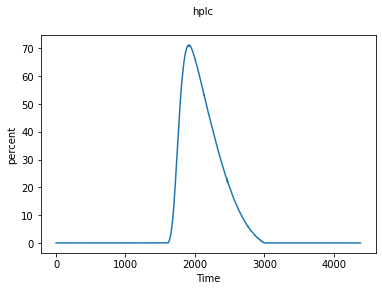

In [17]:
grafik(df_X.loc[0].values)

STUMPY

In [18]:
import stumpy

In [19]:
df_status=pd.DataFrame(df[col[-1]])
df_status.columns=["status"]
df_id=pd.DataFrame(df[col[0]])
df_id.columns=["id"]

df.iloc[0][0]


'M13127N_detect3020'

In [20]:
df_id.head()

,id
0,M13127N_detect3020
1,M13144N_detect3020
2,M13153N_detect3020
3,M14028N_detect3020
4,M14049N_detect3020


In [21]:
mp=stumpy.stump(df_X.iloc[0].values,100)

In [22]:
mp


array([[0.0, 26, -1, 26],
       [0.0, 27, -1, 27],
       [0.0, 28, -1, 28],
       ...,
       [0.0, 4256, 4256, -1],
       [0.0, 4257, 4257, -1],
       [0.0, 4258, 4258, -1]], dtype=object)

In [23]:
discords=[i[0] for i in mp]

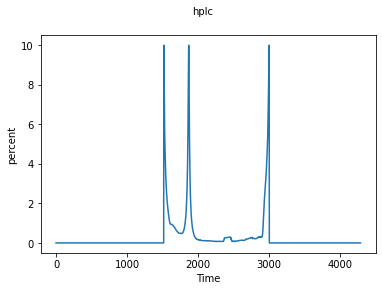

In [24]:
grafik(discords)

In [25]:
def generate_matrix_profile_graf(i,m=300):
    mp=[]
    grafik(df_X.loc[i].values,head=str(i)+" "+df_id.loc[i].values[0][:8]+" "+df_status.loc[i].values[0])
    mp=stumpy.stump(df_X.iloc[i].values,m)
    discords=[ix[0] for ix in mp]
    grafik(discords,head=str(i)+" "+df_id.loc[i].values[0][:8]+" "+df_status.loc[i].values[0])
    return(discords)



In [26]:
len(df_status)

205

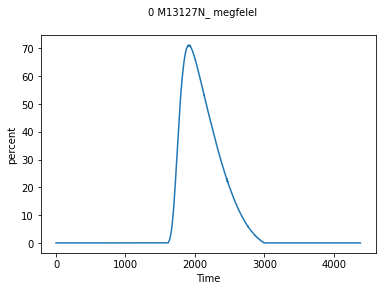

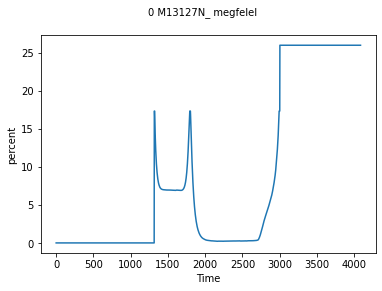

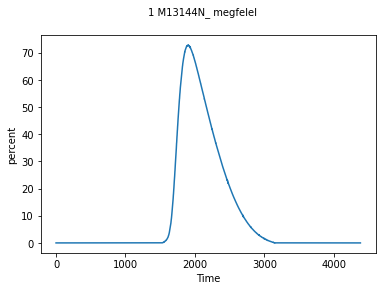

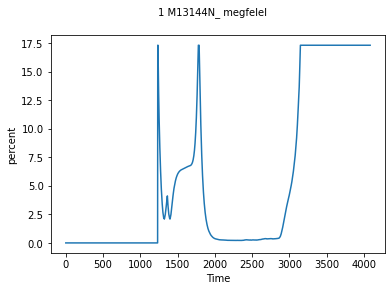

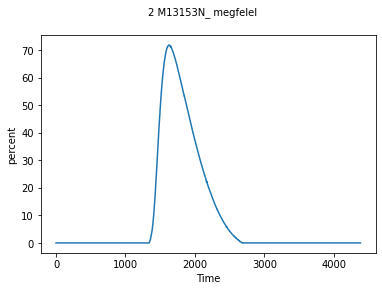

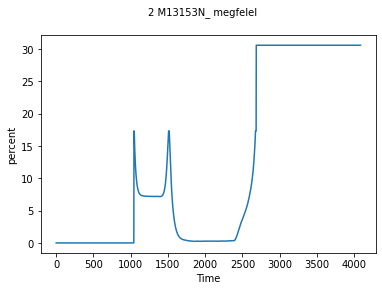

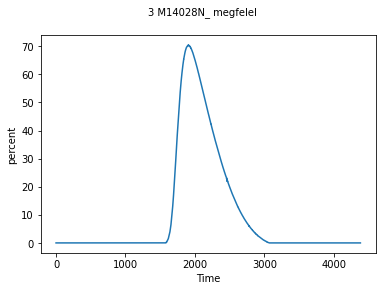

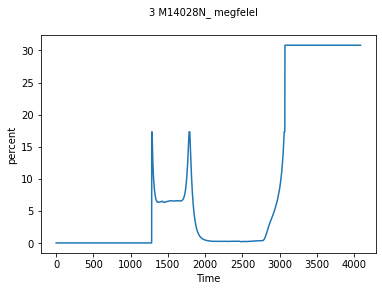

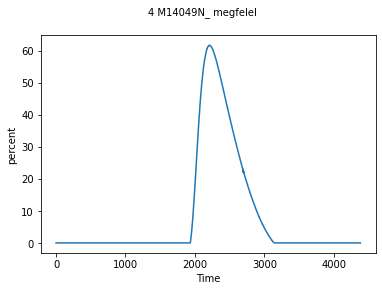

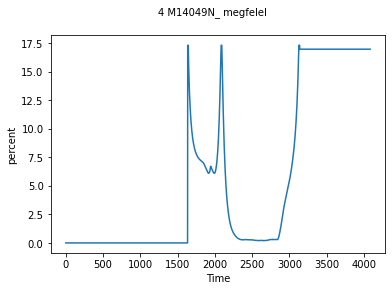

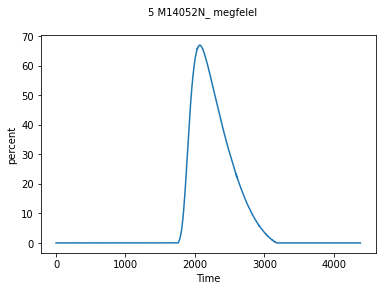

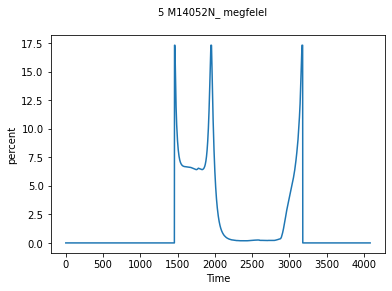

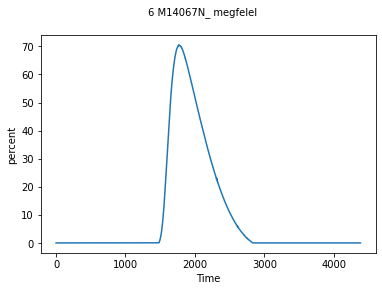

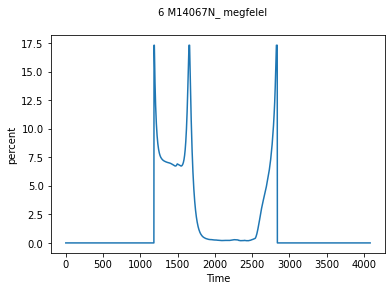

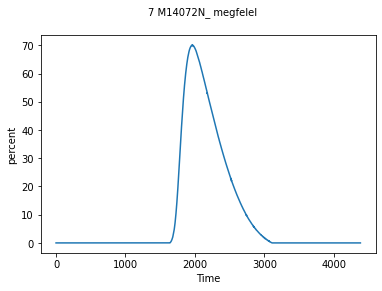

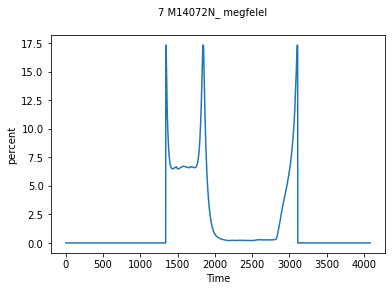

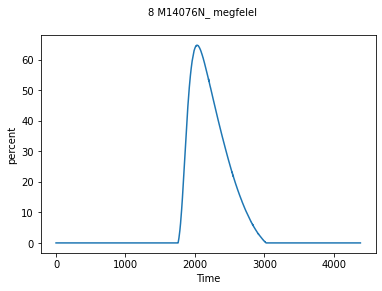

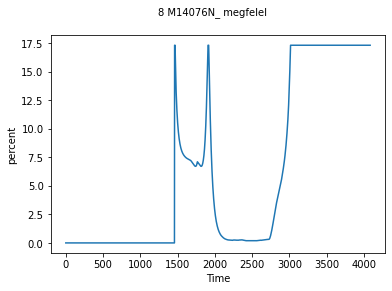

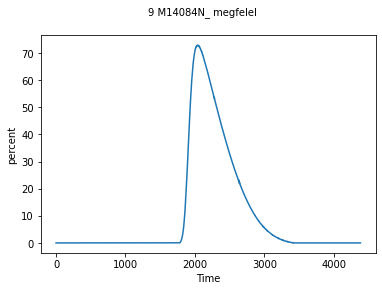

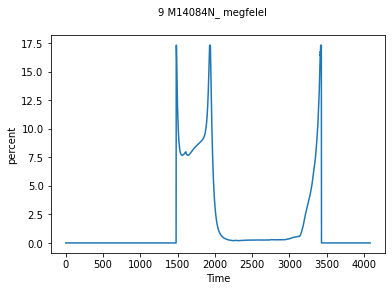

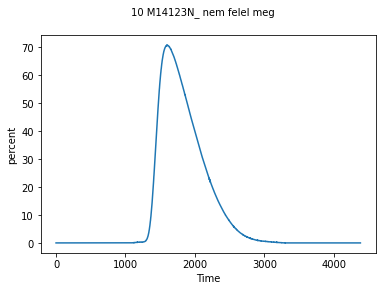

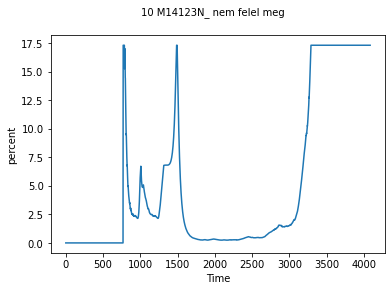

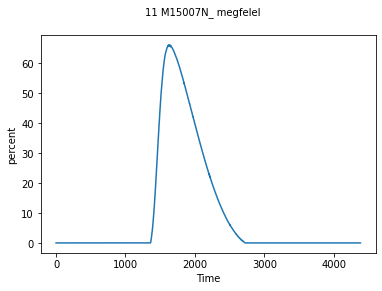

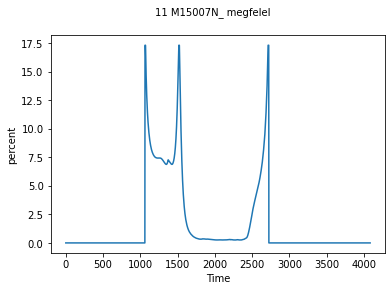

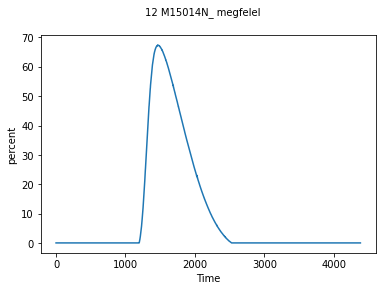

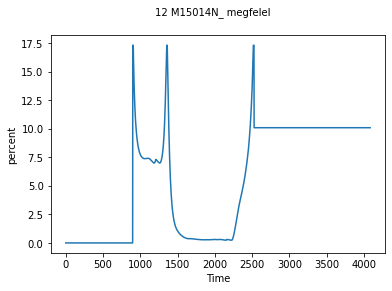

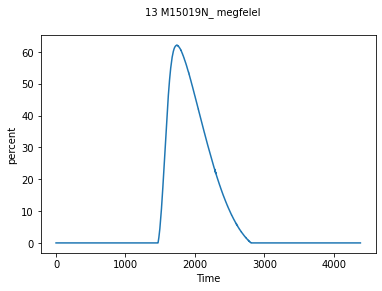

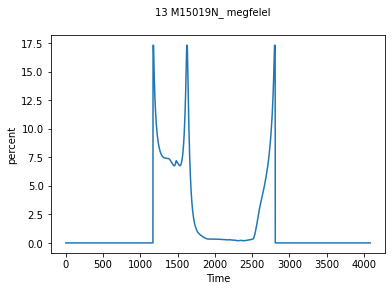

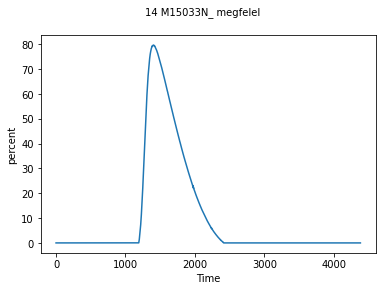

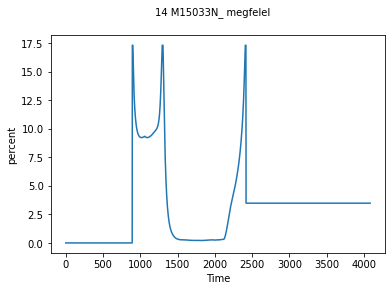

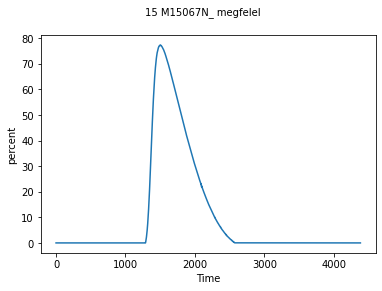

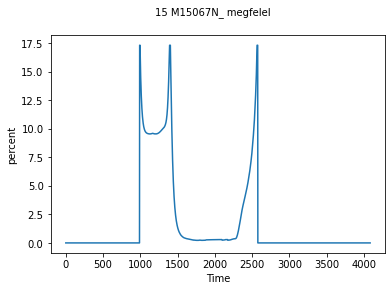

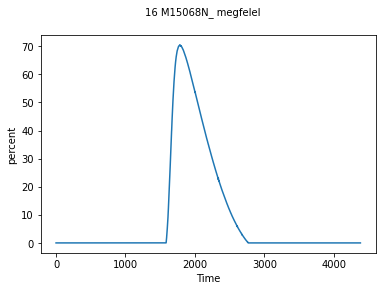

In [ ]:
X_discord=[]
for i in range(len(df_status)):
   
    disc=generate_matrix_profile_graf(i)
    X_discord.append(disc)

In [ ]:
print(X_discord[1])

In [ ]:
df_y=df[col[-2:-1]]

In [ ]:
df_y2=df[col[-1]]

In [ ]:
df_y2

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df["coded"] = LE.fit_transform(df_y2)



In [ ]:
df_y.columns=["Value"]

In [ ]:
df_y.Value.describe()

In [ ]:
df_y2=df["coded"]

In [ ]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
df_y.Value.min()

In [ ]:
df_y_scaled=min_max_scaling(df_y.Value)

In [ ]:
df_y_scaled.head()


##Mentés

In [ ]:
import pandas as pd

In [ ]:
#df_train=pd.read_csv("train_200.csv")
#df_test=pd.read_csv("test_200.csv")


##Tanulás

In [ ]:
df_y

In [ ]:
from sklearn import preprocessing
min_max_scaler_y = preprocessing.MinMaxScaler()
df_y_minmax=min_max_scaler_y.fit_transform(pd.array(df_y.Value).reshape(-1,1))


Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_y2=df[col[-1]]
LE = LabelEncoder()
df["coded"] = LE.fit_transform(df_y2)
df_y2=df["coded"]

In [ ]:
min_max_scaler_y = preprocessing.MinMaxScaler()
df_X_minmax=min_max_scaler_y.fit_transform(X_discord)



In [ ]:
# start learning

In [ ]:
_MODEL_="conv"

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout,Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax,RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error, mean_absolute_error, binary_crossentropy
from tensorflow.keras import backend as K



model_name="HPLC_"+_MODEL_+"_Matrix_Profile_"
def scheduler(epoch, lr):
       #return 0.00003

    '''    
    maxx=0.00001
    minn=0.001
    frekvency=3
    o=(epoch % frekvency)/frekvency * (maxx-minn)+minn
    return o
    '''
        
    if epoch<4000:
        return 0.00005  
    elif epoch <8000:
        return 0.00001

    
    
    return 0.00001
if _MODEL_=="conv":
    callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_loss_{loss:.3f}_val_loss_{val_loss:.3f}_BA_{binary_accuracy:0.2f}VBA_{val_binary_accuracy:0.2f}.hdf5 ", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]

In [ ]:
max_input_length=len(df_X_minmax[0])
print(max_input_length)
n_out=1 

In [ ]:
if _MODEL_=="lstm":
    # LSTM
    # lstm_size=45 túltanul
    # lstm_size=5 nem tanul
    # lstm_size=25 nem tanul
    # lstm_size=35 nem tanul

    lstm_size=45
    

    K.clear_session
    x= Input(shape=(max_input_length,1,))

    #conv1=Conv1D(filters=8, kernel_size=2, padding='same', activation='relu')(embedded_x)
    #MP=MaxPooling1D(pool_size=1)(conv1)
    lstm_output_1= Bidirectional(LSTM(units=lstm_size,return_sequences=True,dropout=0.1,kernel_regularizer="L2"))(x)  #,return_state=True
    lstm_output_2= Bidirectional(LSTM(units=lstm_size,return_sequences=True,dropout=0.1))(lstm_output_1)
    lstm_output_3= Bidirectional(LSTM(units=lstm_size,return_sequences=True,dropout=0.1))(lstm_output_2) # return_sequences=True,return_state=True,


    #c1=Concatenate(axis=1,name="con1")([lstm_output_1[1],lstm_output_2[1]])
    #c2=Concatenate(axis=1,name="con2")([c1,lstm_output_3[1]])

    lstm_output=Dropout(0.1)(lstm_output_3)

    Dense_out=Flatten()(lstm_output)
    #Dense_out= Dense(50, activation="sigmoid",kernel_initializer="HeNormal")(Dense_out)

    predictions= Dense(n_out, activation="sigmoid",kernel_regularizer="L1")(Dense_out)
    model=Model(inputs=x, outputs=predictions)



In [ ]:
_MODEL_="conv"

In [ ]:
if _MODEL_=="conv":
    # Importáld a megfelelő rétegeket
    from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout,Reshape,MaxPooling1D,Normalization
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax,RMSprop
    from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error,binary_crossentropy

    K.clear_session
    x1=Input(shape=(max_input_length,1))
    x3=Conv1D(2,kernel_size=(100),kernel_regularizer="L2")(x1)
    x4=MaxPooling1D(3)(x3)
    #x5=Conv1D(2,kernel_size=(2))(x4)
    #x6=MaxPooling1D(3)(x5)


    #conv1=Conv1D(filters=8, kernel_size=2, padding='same', activation='relu')(embedded_x)
    #MP=MaxPooling1D(pool_size=1)(conv1)


    x7=Flatten()(x4)
    x7=Dropout(0.05)(x7)
    Dense_out= Dense(24, activation="sigmoid",kernel_initializer="HeNormal",kernel_regularizer="L2")(x7) # 
    Dense_out=Dropout(0.65)(Dense_out)
    predictions= Dense(n_out, activation="relu",kernel_regularizer="L2")(Dense_out)
    model_conv=Model(inputs=x1, outputs=predictions)

In [ ]:
'''
nem tanul, cak magol kevés az adat


from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax,RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error, mean_absolute_error, binary_crossentropy
from tensorflow.keras import backend as K

K.clear_session
x= Input(shape=(max_input_length,))


dense_o=Dense(units=4,activation="sigmoid",kernel_initializer="HeNormal")(x)
dense_o=Dropout(0.25)(dense_o)

#dense_o=Dense(units=10,activation="sigmoid",kernel_initializer="HeNormal")(dense_o)  # unit = 100 esetén : 0.0042
#dense_o=Dropout(0.2)(dense_o)
#dense_o=Dense(units=5,activation="sigmoid",kernel_initializer="HeNormal", name="vektor")(dense_o)  # unit = 100 esetén : 0.0042
#dense_o=Dropout(0.00)(dense_o)



predictions= Dense(units=1, activation="sigmoid", kernel_initializer="HeNormal")(dense_o)  # kernel_initializer="HeNormal"
model=Model(inputs=x, outputs=predictions)

'''

In [ ]:
if _MODEL_=="conv":
    model_conv.summary()
if _MODEL_=="lstm":
    model.summary()

In [ ]:
import numpy as np

In [ ]:
!rm  HPLC*

In [ ]:
# Loss 
if _MODEL_=="lstm":
    loss = binary_crossentropy           # mean_absolute_error #binary_crossentropy  #mean_absolute_error #categorical_crossentropy 
    # Optimizer
    optimizer =Adam(learning_rate=0.1) #Ízlés szerint...
    
    # Compilation
    #############

    model.compile(optimizer=optimizer,loss=loss,metrics=["binary_accuracy"])

if _MODEL_=="conv":
    print("CONV")
    loss = binary_crossentropy           # mean_absolute_error #binary_crossentropy  #mean_absolute_error #categorical_crossentropy 
    # Optimizer
    optimizer =Adam(learning_rate=0.1) #Ízlés szerint...
    
    # Compilation
    #############

    model_conv.compile(optimizer=optimizer,loss=loss,metrics=["binary_accuracy"])


In [ ]:
_MODE_="Tanul"

In [ ]:
if _MODE_=="load":
    url="https://github.com/sipocz/LSTM_HPLC/raw/d618ec12225d2dfeb07f48a4c10840bcf822d3ca/models/XXXX_loss_0.0795_acc_0.9783_val_acc_0.9524_20220410133100.hdf5"
    !wget $url
    fname="XXXX_loss_0.0795_acc_0.9783_val_acc_0.9524_20220410133100.hdf5"
    model.load_weights(fname)

In [ ]:
_MODE_="Tanul"

In [ ]:
!rm HPLC*

In [ ]:
df_y2[0]

In [ ]:
# Illesszük az adatra a modellt
epochs=3000
if _MODE_=="Tanul" and _MODEL_=="lstm":
    history=model.fit(
            x=df_X_minmax,
            y=df_y2, 
            epochs=epochs, 
            batch_size=12,
            validation_split=0.1,         
            callbacks=[callbacks]          
            )

if _MODE_=="Tanul" and _MODEL_=="conv":
    history=model_conv.fit(
            x=df_X_minmax,
            y=df_y2, 
            epochs=epochs, 
            batch_size=12,
            validation_split=0.2,         
            callbacks=[callbacks]          
            )


In [ ]:
def plot_history(history):
    import matplotlib.pyplot as plt
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_history(history)

In [ ]:
i1=model.get_layer("dense")

In [ ]:
i1.activation

In [ ]:
o1=model.get_layer("vektor")

In [ ]:
from tensorflow.keras import backend as K

In [ ]:


hidden_states_fun = K.function([i1.input],[o1.output])

In [ ]:
def get_embedding(X, index):
    """Return the hidden state associated with an input at the given timestep.
    """
    hidden_states = hidden_states_fun(X.iloc[index:index+1,:].values)
    return hidden_states

In [ ]:
df_X_minmax.iloc[0:1,:].values

In [ ]:
oo_list=[]
for i in range( len(df_X_minmax)):
    xo=get_embedding(df_X_minmax,i)
    oo_list.append(xo[0].tolist()[0])

In [ ]:
oo_list[8]

In [ ]:
df["time"].to_list()

In [ ]:
batchid=df["time"].to_list()

In [ ]:
len(batchid)

In [ ]:
len(oo_list)

In [ ]:
df_l=pd.DataFrame(oo_list)

In [ ]:
df_l["y"]=df_y2

In [ ]:
df_l["batchid"]=batchid

In [ ]:
df_l.head()

In [ ]:
df_l.to_csv("encoded.csv")

In [ ]:
---

In [ ]:
_MODE_="Tesztel"

In [ ]:
fname="https://github.com/sipocz/LSTM_HPLC/raw/d618ec12225d2dfeb07f48a4c10840bcf822d3ca/models/XXXX_loss_0.0795_acc_0.9783_val_acc_0.9524_20220410133100.hdf5"
if _MODE_=="Tesztel":
    #!rm XXXX*
    !wget $fname

In [ ]:
fname="XXXX_loss_0.0795_acc_0.9783_val_acc_0.9524_20220410133100.hdf5"

In [ ]:
model.load_weights(fname)

In [ ]:
pred=model.predict(df_X_minmax)

In [ ]:
def maxpos(alist):
    temp = max(alist)
    res = [i for i, j in enumerate(alist) if j == temp]
    return res[0]  


In [ ]:
#from IPython.lib.display import YouTubeVideo
def show_difference(pred,ytrain,verbose=False, only_wrong=True, to_table=False):
    ecounter=0
    o=[]
    for i in range(len(pred)):
        predi=pred[i]
        traini=ytrain[i]
        if abs(predi-traini)>0.5:
            ecounter+=1
            o.append(i)
        if verbose:
            if only_wrong:
                
                if abs(predi-traini)>0.5: 
                    if to_table:
                        print(f"|{i}|{predi}|{traini}|")
                    else:
                        print(f"{i}, {predi}, {traini}")
                
            else:
                print(f"{i}, {predi}, {traini}")

                
    print(f"Hiba szám: {ecounter:6}, arány: {ecounter/len(ytrain)*100:3.2f}% ")
    return(o)


In [ ]:
df.head()

In [ ]:
df.iloc[188]

In [ ]:
wrong_prediction_list=show_difference(pred,df_y2,verbose=True,to_table=True)

In [ ]:
def show_batchID(df,index_list):
    for i in index_list:
        print(f"{i:4}. --> {df.iloc[i].time.split('_')[0]}")



In [ ]:
show_batchID(df,wrong_prediction_list)

In [ ]:
---

In [ ]:
!pip install pypng
!pip install pyqrcode

In [ ]:


import pyqrcode
link_1 = pyqrcode.create('https://www.linkedin.com/in/36204746473/')
link_1.png("p1.png",scale=3,module_color=(20,20,20,255), background=(200,200,200,255))

### Model usage

In [ ]:
test_df=pd.read_csv("test_200.csv")

In [ ]:
print(len(test_df))

In [ ]:
test_df.head()

In [ ]:
__MAXWORD__=200
test_word_list=list(test_df.Words_in_Numbers)
x_test=create_x(test_word_list,maxword=__MAXWORD__)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
o=["kitaifa","michezo","biashara","kamataifa","burudani"]

In [ ]:
def data_generator(y_pred):
    out=[]
    for pred in y_pred:
        t1=[0,0,0,0,0]
        ox=pred.argmax()
        t1[ox]=1
        out.append(t1) 
    return(out)

In [ ]:
output=data_generator(y_pred)

output0=[x[0] for x in output]
output1=[x[1] for x in output]
output2=[x[2] for x in output]
output3=[x[3] for x in output]
output4=[x[4] for x in output]

In [ ]:
df_csv=pd.DataFrame()
df_csv["test_id"]=test_df["swahili_id"]
df_csv[o[0]]=output0
df_csv[o[1]]=output1
df_csv[o[2]]=output2
df_csv[o[3]]=output3
df_csv[o[4]]=output4

In [ ]:
df_csv.head()

In [ ]:
from datetime  import datetime

In [ ]:
a=datetime.now().strftime("%Y%m%d_%H%M%S")

In [ ]:
fname="submission_"+a+".csv"

In [ ]:
df_csv.to_csv(fname,index=False)

In [ ]:
!head $fname